<a href="https://colab.research.google.com/github/Rhitabrat/deep-learning-CS510/blob/main/hw2/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HW 2

Sources

https://www.tensorflow.org/tutorials/images/cnn

https://github.com/arshren/Feature-Visualization/blob/master/Feature%20Visualization.ipynb

https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/

https://www.analyticsvidhya.com/blog/2021/03/the-architecture-of-lenet-5/


In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [3]:
train_images.shape

(50000, 32, 32, 3)

In [4]:
test_images.shape

(10000, 32, 32, 3)

In [5]:
train_images, test_images = train_images / 255.0, test_images / 255.0

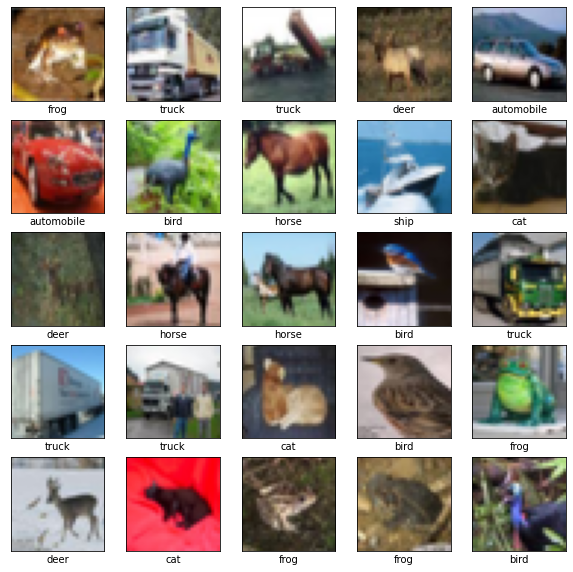

In [6]:
# visualization
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

#LeNet Model

In [28]:
# hyperparameters
learning_rate = [0.1, 0.01, 0.001]
activation = ['sigmoid', 'tanh']
loss = [tf.keras.losses.MeanSquaredError(name="MSE"), 
        tf.keras.losses.CategoricalCrossentropy(name="Cross Entropy")]

In [29]:
model = models.Sequential()
model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1,1), activation='tanh', input_shape=(32, 32, 3)))
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1,1), activation='tanh'))
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1,1), activation='tanh',))

In [30]:
model.add(layers.Flatten())
model.add(layers.Dense(84, activation='tanh'))
model.add(layers.Dense(10, activation='softmax'))

In [31]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d_8 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_13 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_9 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_14 (Conv2D)          (None, 1, 1, 120)         48120     
                                                                 
 flatten_4 (Flatten)         (None, 120)              

In [32]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

history = model.fit(train_images, 
                    train_labels, 
                    epochs=5, 
                    validation_data=(test_images, test_labels))

Epoch 1/5
1563/1563 [==============================] - 9s 5ms/step - loss: 27.6101 - accuracy: 0.1006 - val_loss: 27.6100 - val_accuracy: 0.1056
Epoch 2/5
1563/1563 [==============================] - 8s 5ms/step - loss: 27.6101 - accuracy: 0.1014 - val_loss: 27.6100 - val_accuracy: 0.1032
Epoch 3/5
1563/1563 [==============================] - 8s 5ms/step - loss: 27.6101 - accuracy: 0.1000 - val_loss: 27.6100 - val_accuracy: 0.0984
Epoch 4/5
1563/1563 [==============================] - 8s 5ms/step - loss: 27.6101 - accuracy: 0.0966 - val_loss: 27.6100 - val_accuracy: 0.0886
Epoch 5/5
1563/1563 [==============================] - 8s 5ms/step - loss: 27.6101 - accuracy: 0.1006 - val_loss: 27.6100 - val_accuracy: 0.1034


In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Learning Rate: " + str(learning_rate) + 
          "\nActivation: " + activation +
          ", Loss: "+ str(loss.name))
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Learning Rate: " + str(learning_rate) + 
          "\nActivation: " + activation +
          ", Loss: "+ str(loss.name))
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'])
plt.show()

In [37]:
%matplotlib inline

class LeNet():
    def __init__(self, learning_rate, activation, loss):
        self.learning_rate = learning_rate
        self.activation = activation
        self.loss = loss
        
    def create_layers(self):
        model = models.Sequential()
        model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1,1), activation=self.activation,
                                input_shape=(32, 32, 3)))
        model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2,2)))
        model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1,1), activation=self.activation))
        model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2,2)))
        model.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1,1), activation=self.activation,))

        model.add(layers.Flatten())
        model.add(layers.Dense(84, activation=self.activation))
        model.add(layers.Dense(10, activation='softmax'))

        # print(model.summary())
        
        return model

    def train_model(self, model):
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=self.learning_rate),
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

        history = model.fit(train_images, 
                    train_labels, 
                    epochs=2,
                    validation_data=(test_images, test_labels))
        return history
    
    def plot_acc_loss(self, history):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

        ax1.plot(history.history['accuracy'])
        ax1.plot(history.history['val_accuracy'])
        ax1.set_title("Learning Rate: " + str(self.learning_rate) + 
                "\nActivation: " + self.activation +
                ", Loss: "+ str(self.loss.name))
        ax1.set(xlabel='Epoch', ylabel='Accuracy')
        ax1.legend(['train', 'val'])

        ax2.plot(history.history['loss'])
        ax2.plot(history.history['val_loss'])
        ax2.set_title("Learning Rate: " + str(self.learning_rate) + 
                "\nActivation: " + self.activation +
                ", Loss: "+ str(self.loss.name))
        ax2.set(xlabel='Epoch', ylabel='Loss')
        ax2.legend(['train', 'val'])

        fig.show()

In [38]:
# hyperparameters
learning_rate = [0.1, 0.01, 0.001]
activation = ['sigmoid', 'tanh']
loss = [tf.keras.losses.MeanSquaredError(name="MSE"), 
        tf.keras.losses.CategoricalCrossentropy(name="Cross Entropy")]

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_63 (Conv2D)          (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d_42 (Avera  (None, 14, 14, 6)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_64 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_43 (Avera  (None, 5, 5, 16)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_65 (Conv2D)          (None, 1, 1, 120)         48120     
                                                                 
 flatten_21 (Flatten)        (None, 120)             

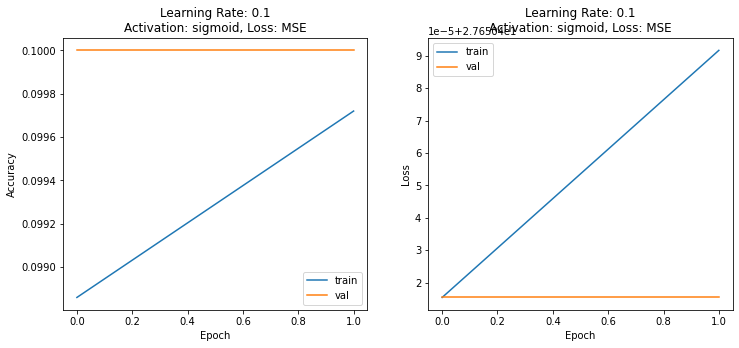

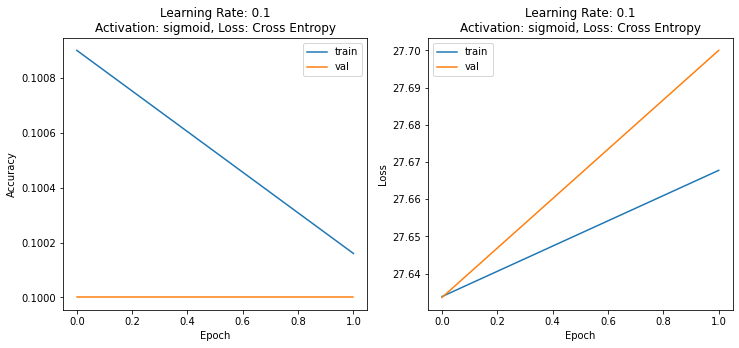

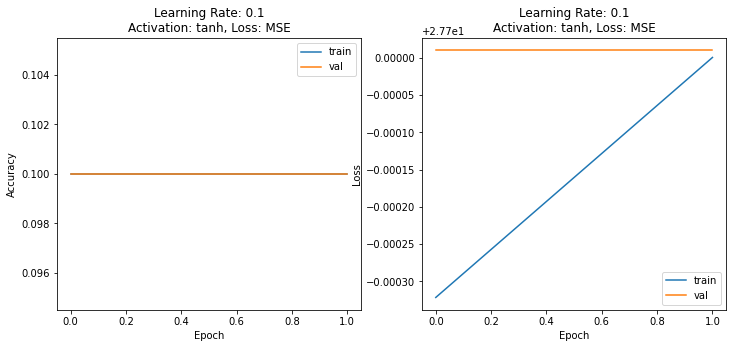

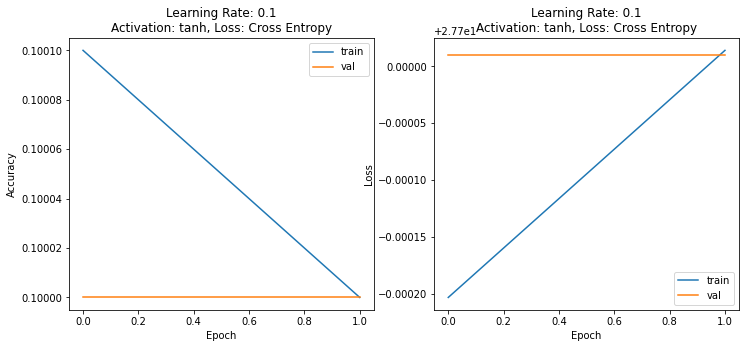

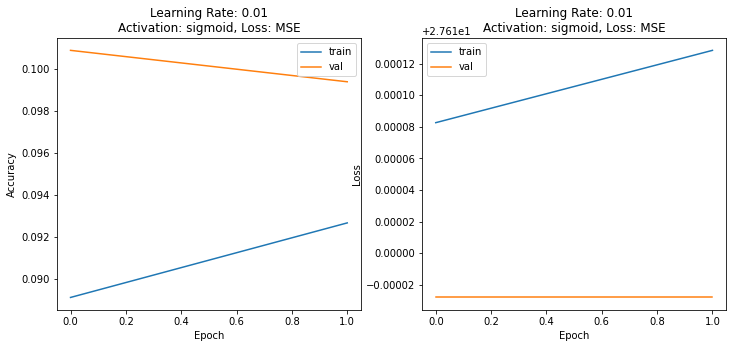

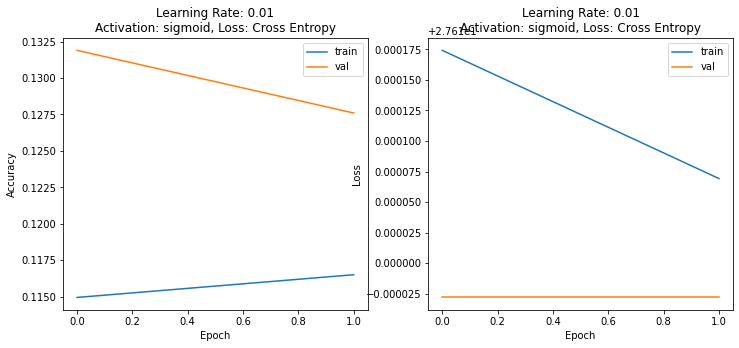

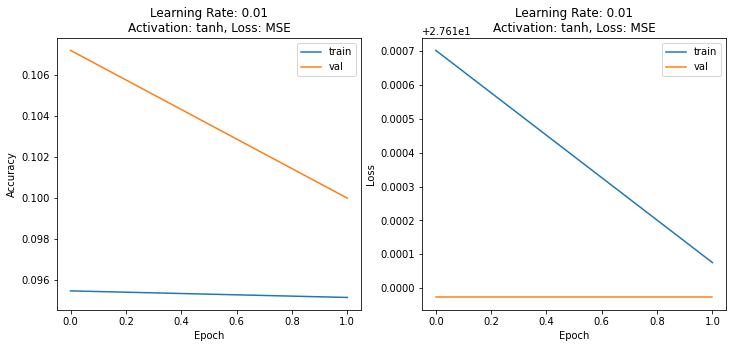

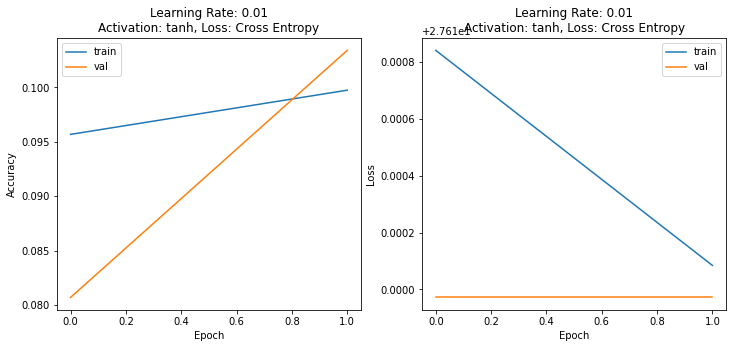

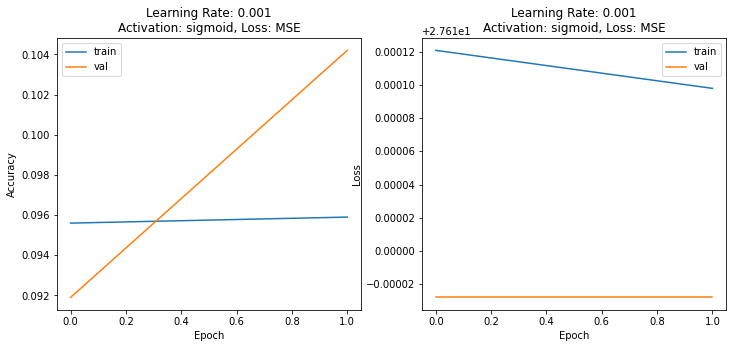

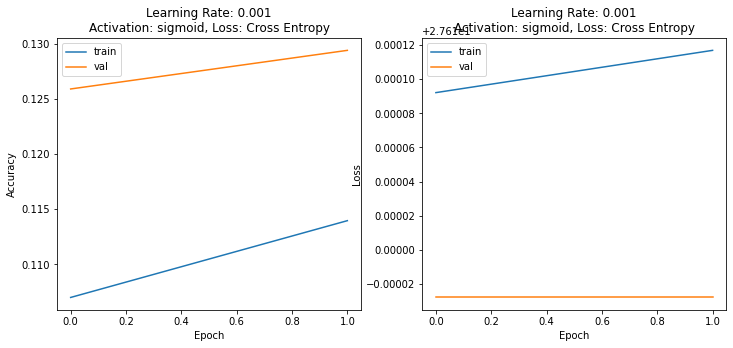

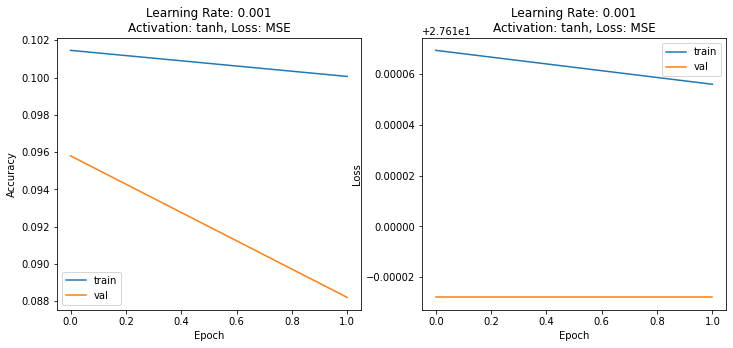

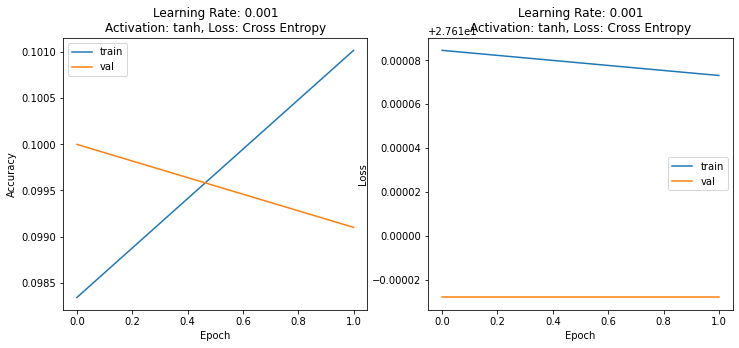

In [39]:
count = 0
for lr in learning_rate:
    for act in activation:
        for ls in loss:
            obj = LeNet(learning_rate=lr, activation=act, loss=ls)
            model_layers = obj.create_layers()
            
            # print the layers
            
            if count==0:
                print(model_layers.summary())
            count+=1

            print("_________________________________________________________________")
            print(f"\n\nExperiment #{count}")    
            print("=================================================================")
            print("Learning Rate: ", lr)
            print("Activation   : ", act)
            print("Loss         : ", ls.name)
            print("=================================================================")

            history = obj.train_model(model_layers)
            obj.plot_acc_loss(history)
            # print("_________________________________________________________________")

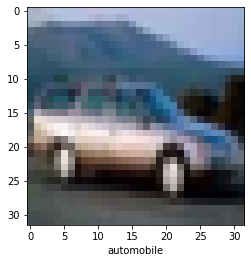

In [12]:
# visualization
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.imshow(train_images[4])
plt.xlabel(class_names[train_labels[4][0]])
plt.show()

In [13]:
ten_images = train_images[0:10]

In [ ]:
# successive_outputs = [layer.output for layer in model.layers[0:]]

# #visualization_model = Model(img_input, successive_outputs)
# visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# # Let's prepare a random input image of a cat or dog from the training set.
# #cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
# #dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]

# #img_path = random.choice(cat_img_files + dog_img_files)

# # img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

# # x = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
# x = automobile
# x = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# # Rescale by 1/255
# x /= 255.0

In [ ]:
# # Let's run our image through our network, thus obtaining all
# # intermediate representations for this image.
# successive_feature_maps = visualization_model.predict(x)

# # These are the names of the layers, so can have them as part of our plot
# layer_names = [layer.name for layer in model.layers]

In [74]:
# for layer_name, feature_map in zip(layer_names, successive_feature_maps):
#   print(feature_map.shape)
#   if len(feature_map.shape) == 4:
    
#     #-------------------------------------------
#     # Just do this for the conv / maxpool layers, not the fully-connected layers
#     #-------------------------------------------
#     n_features = feature_map.shape[-1]  # number of features in the feature map
#     size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
#     # We will tile our images in this matrix
#     display_grid = np.zeros((size, size * n_features))
    
#     #-------------------------------------------------
#     # Postprocess the feature to be visually palatable
#     #-------------------------------------------------
#     for i in range(n_features):
#       x  = feature_map[0, :, :, i]
#       x -= x.mean()
#       x /= x.std ()
#       x *=  64
#       x += 128
#       x  = np.clip(x, 0, 255).astype('uint8')
#       display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

#     #-----------------
#     # Display the grid
#     #-----------------

#     scale = 20. / n_features
#     plt.figure( figsize=(scale * n_features, scale) )
#     plt.title ( layer_name )
#     plt.grid  ( False )
#     plt.imshow( display_grid, aspect='auto', cmap='gray' )

In [ ]:
# [feature_shape.shape for feature_shape in successive_feature_maps]

In [ ]:
# feature_map = successive_feature_maps[2]
# layer_name = layer_names[2]

# print("Feature Map Shape:", feature_map.shape)
# print("layer_name:       ", layer_name)

# from matplotlib import pyplot

# square = 4

# ix = 1
# for _ in range(square):
#     for _ in range(square):
#         ax = pyplot.subplot(square, square, ix)
#         ax.set_xticks([])
#         ax.set_yticks([])
#         ax.imshow(feature_map[0, :, :, ix-1], cmap='gray')
#         ix += 1

# pyplot.show()

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

In [ ]:
# images
from matplotlib import pyplot

successive_outputs = [layer.output for layer in model.layers[0:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

layer_names = [layer.name for layer in model.layers]
layer_name = layer_names[2]
print("Which Conv layer output is used?", layer_name)

for x in ten_images:

    plt.imshow(x)
    plt.show()

    # x = automobile
    x = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

    # Rescale by 1/255
    x /= 255.0

    successive_feature_maps = visualization_model.predict(x)
    feature_map = successive_feature_maps[2]

    square = 4

    ix = 1
    for _ in range(square):
        for _ in range(square):
            ax = pyplot.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            ax.imshow(feature_map[0, :, :, ix-1], cmap='gray')
            ix += 1

    pyplot.show()

# 2

In [50]:
activation = 'relu'
learning_rate = 0.001
loss = tf.keras.losses.CategoricalCrossentropy(name="Cross Entropy")

In [51]:
model = models.Sequential()
model.add(layers.Conv2D(6, kernel_size=(3, 3), strides=(1,1), activation=activation, input_shape=(32, 32, 3)))
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(layers.Conv2D(16, kernel_size=(3, 3), strides=(1,1), activation=activation))
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1,1), activation='tanh',))

model.add(layers.Flatten())
model.add(layers.Dense(84, activation='tanh'))
model.add(layers.Dense(10, activation='softmax'))

In [52]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(train_images, 
                    train_labels, 
                    epochs=5, 
                    validation_data=(test_images, test_labels))

Epoch 1/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5270 - accuracy: 0.4467 - val_loss: 1.3496 - val_accuracy: 0.5193
Epoch 2/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3034 - accuracy: 0.5379 - val_loss: 1.2865 - val_accuracy: 0.5458
Epoch 3/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2227 - accuracy: 0.5681 - val_loss: 1.2317 - val_accuracy: 0.5683
Epoch 4/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1636 - accuracy: 0.5875 - val_loss: 1.1921 - val_accuracy: 0.5847
Epoch 5/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1170 - accuracy: 0.6058 - val_loss: 1.1663 - val_accuracy: 0.5899


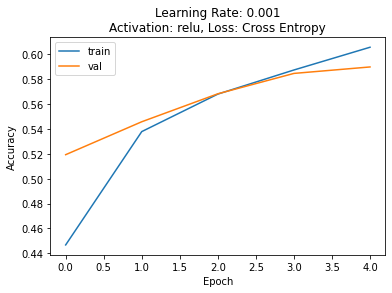

In [53]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Learning Rate: " + str(learning_rate) + 
          "\nActivation: " + activation +
          ", Loss: "+ str(loss.name))
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'])
plt.show()

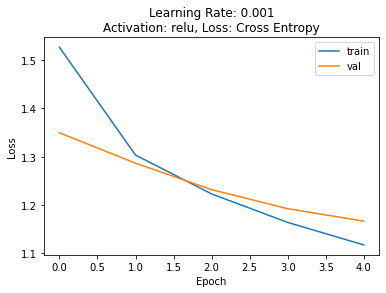

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Learning Rate: " + str(learning_rate) + 
          "\nActivation: " + activation +
          ", Loss: "+ str(loss.name))
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'])
plt.show()

#3

In [88]:
model_3 = models.Sequential()

model_3.add(layers.Conv2D(6, kernel_size=(3, 3), strides=(1,1), 
                        activation='tanh', input_shape=(32, 32, 3), padding='valid'))
model_3.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2,2)))

model_3.add(layers.Conv2D(16, kernel_size=(3, 3), strides=(1,1), 
                        activation='tanh', padding='valid'))
model_3.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2,2)))

model_3.add(layers.Conv2D(32, kernel_size=(3, 3), strides=(1,1), 
                        activation='tanh', padding='valid'))
model_3.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2,2)))

model_3.add(layers.Conv2D(64, kernel_size=(3, 3), strides=(1,1), 
                        activation='tanh', padding='same'))
model_3.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2,2)))

model_3.add(layers.Conv2D(128, kernel_size=(3, 3), strides=(1,1), 
                        activation='tanh', padding='same'))

model_3.add(layers.Flatten())
model_3.add(layers.Dense(300, activation='tanh'))
model_3.add(layers.Dense(10, activation='softmax'))

In [89]:
model_3.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_113 (Conv2D)         (None, 30, 30, 6)         168       
                                                                 
 average_pooling2d_90 (Avera  (None, 15, 15, 6)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_114 (Conv2D)         (None, 13, 13, 16)        880       
                                                                 
 average_pooling2d_91 (Avera  (None, 6, 6, 16)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_115 (Conv2D)         (None, 4, 4, 32)          4640      
                                                                 
 average_pooling2d_92 (Avera  (None, 2, 2, 32)       

In [91]:
import time
start = time.time()

model_3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model_3.fit(train_images, 
                    train_labels, 
                    epochs=30, 
                    validation_data=(test_images, test_labels))

end = time.time()
total_time = end - start
print("\n"+ str(total_time))

Epoch 1/30
1563/1563 [==============================] - 12s 7ms/step - loss: 1.4436 - accuracy: 0.4821 - val_loss: 1.4145 - val_accuracy: 0.4923
Epoch 2/30
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3830 - accuracy: 0.5063 - val_loss: 1.3747 - val_accuracy: 0.5092
Epoch 3/30
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3363 - accuracy: 0.5235 - val_loss: 1.3437 - val_accuracy: 0.5120
Epoch 4/30
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2931 - accuracy: 0.5382 - val_loss: 1.3163 - val_accuracy: 0.5355
Epoch 5/30
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2570 - accuracy: 0.5524 - val_loss: 1.3010 - val_accuracy: 0.5375
Epoch 6/30
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2237 - accuracy: 0.5640 - val_loss: 1.2829 - val_accuracy: 0.5458
Epoch 7/30
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1926 - accuracy: 0.5759 - val_loss: 1.2815 - val_accuracy